In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

ImportError: Traceback (most recent call last):
  File "c:\Users\trupt\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar',
           'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

df = pd.read_csv(url, names=columns)


In [3]:
df

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
x=df.drop('letter',axis=1)

In [5]:
y=df['letter']

In [6]:
#Appy the standard scaler on x
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [7]:
#Apply Label encoder and one hot encoding to y

le=LabelEncoder()
y_encoded=le.fit_transform(y)
y_onehot=to_categorical(y_encoded)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_onehot,test_size=0.2)

In [9]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(64,activation='relu'))
model.add(Dense(26,activation='softmax'))

c:\Users\sanke\miniforge3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train,validation_split=0.2,epochs=30,batch_size=64)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3235 - loss: 2.5298 - val_accuracy: 0.6916 - val_loss: 1.1150
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7335 - loss: 0.9663 - val_accuracy: 0.7734 - val_loss: 0.7854
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7955 - loss: 0.7026 - val_accuracy: 0.8028 - val_loss: 0.6447
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8343 - loss: 0.5702 - val_accuracy: 0.8284 - val_loss: 0.5552
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.4881 - val_accuracy: 0.8472 - val_loss: 0.4936
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8766 - loss: 0.4265 - val_accuracy: 0.8612 - val_loss: 0.4426
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8940 - loss: 0.3732 - val_accuracy: 0.8766 - val_loss: 0.4034
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9015 - loss: 0.3416 - val_accuracy: 0.

In [12]:
loss,accuracy=model.evaluate(x_test,y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9525 - loss: 0.1612


In [13]:
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
y_pred=model.predict(x_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step


In [15]:
predicted_labels=le.inverse_transform(np.argmax(y_pred,axis=1))
actual_labels=le.inverse_transform(np.argmax(y_test,axis=1))

In [16]:
cm=confusion_matrix(actual_labels,predicted_labels,labels=le.classes_)

In [17]:
cm

array([[172,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 122,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 141,   0,   1,   1,   1,   2,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 170,   0,   0,   0,   4,   0,   0,   0,   0,   0,
          2,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   3,   0, 125,   1,   3,   1,   0,   0,   1,   2,   1,
          0,   0,   1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   1, 134,   0,   0,   1,   1,   0,   0,   0,
          0,   0,   5,   0,   0,   2,   2,   0,   0,   0,   0,   2,   0],
       [  1,   0,   0,   0,   3,   0, 158,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   

In [18]:
import seaborn as sns

<Axes: >

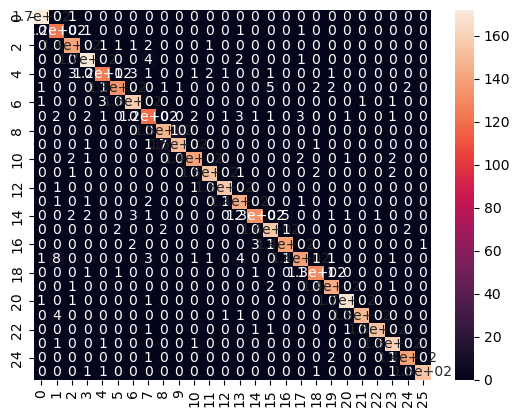

In [19]:
sns.heatmap(cm,annot=True)

In [20]:
print(classification_report(actual_labels,predicted_labels))

              precision    recall  f1-score   support

           A       0.98      0.99      0.99       173
           B       0.88      0.98      0.92       125
           C       0.93      0.96      0.94       147
           D       0.94      0.96      0.95       177
           E       0.94      0.90      0.92       139
           F       0.96      0.90      0.93       149
           G       0.95      0.96      0.95       164
           H       0.88      0.87      0.87       137
           I       0.94      0.94      0.94       158
           J       0.93      0.94      0.93       161
           K       0.96      0.95      0.95       149
           L       0.97      0.96      0.97       160
           M       0.97      0.99      0.98       158
           N       0.91      0.96      0.94       150
           O       0.96      0.88      0.92       151
           P       0.93      0.96      0.95       163
           Q       0.95      0.95      0.95       147
           R       0.94    